<a href="https://colab.research.google.com/github/jungmin0710/K-digital-PythonDeepLearning/blob/main/CNN_CIFAR100_Modeling_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR100 - Categorical Classification
CNN으로 컬러 이미지 분류하기(100종류)
> # Convolutional Neural Network
## Import Keras

In [1]:
import warnings
warnings.filterwarnings('ignore')

* import Keras 

In [2]:
import keras

keras.__version__

'2.4.3'

# I. CIFAR100 Data_Set Load

In [3]:
from keras.datasets import cifar100

(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode = 'fine')

# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape

In [4]:
X_train = X_train.reshape((50000,  32, 32, 3))
X_test = X_test.reshape((10000,  32, 32, 3))

* Normalization

In [5]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

> ## 2) One Hot Encoding

In [6]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# III. MNIST Keras Modeling

> ## 1) Model Define

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers

#CNN
model = models.Sequential()
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
#DNN
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=100, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         147584    
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               5

> ## 2) Model Compile

* 모델 학습방법 설정

In [9]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 5분

In [10]:
%%time

Hist_mnist = model.fit(X_train, y_train,
                       epochs = 50,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/50
313/313 [==============================] - 13s 15ms/step - loss: 4.4575 - accuracy: 0.0267 - val_loss: 3.9018 - val_accuracy: 0.1068
Epoch 2/50
313/313 [==============================] - 4s 13ms/step - loss: 3.9031 - accuracy: 0.0957 - val_loss: 3.4961 - val_accuracy: 0.1690
Epoch 3/50
313/313 [==============================] - 4s 13ms/step - loss: 3.5494 - accuracy: 0.1541 - val_loss: 3.3415 - val_accuracy: 0.1979
Epoch 4/50
313/313 [==============================] - 4s 13ms/step - loss: 3.3315 - accuracy: 0.1970 - val_loss: 3.0795 - val_accuracy: 0.2513
Epoch 5/50
313/313 [==============================] - 4s 13ms/step - loss: 3.1596 - accuracy: 0.2285 - val_loss: 2.9744 - val_accuracy: 0.2689
Epoch 6/50
313/313 [==============================] - 4s 13ms/step - loss: 3.0189 - accuracy: 0.2528 - val_loss: 2.8429 - val_accuracy: 0.2911
Epoch 7/50
313/313 [==============================] - 4s 13ms/step - loss: 2.9222 - accuracy: 0.2695 - val_loss: 2.7763 - val_accuracy: 0.302

> ## 4) 학습 결과 시각화

* Loss Visualization

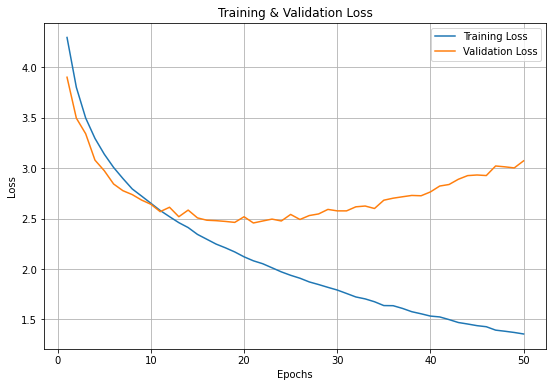

In [11]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.4)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [12]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 2.9472 - accuracy: 0.3811
Loss = 2.94722
Accuracy = 0.38110


# 
# 
# 
# The End
# 
# 
# 